# POS Tag Visualization

1. Visualisasi Interaktif per Kalimat: Untuk melihat tag dan hubungan gramatikal dalam satu kalimat spesifik. Ini paling baik dilakukan dengan spaCy & displaCy.
2. Visualisasi Agregat (Statistik): Untuk melihat frekuensi atau distribusi tag di seluruh data teks. Ini paling cocok menggunakan Matplotlib.

## Menggunakan spaCy dan displaCy

Instalasi
```bash
pip install spacy
python -m spacy download en_core_web_sm
```

In [1]:
import spacy
from spacy import displacy

# Muat model bahasa Inggris
nlp = spacy.load("en_core_web_sm")

teks = "The quick brown fox jumps over the lazy dog."

# Proses teks dengan model spaCy
doc = nlp(teks)

# --- Opsi 1: Menjalankan server lokal (jika menjalankan dari file .py) ---
# Buka http://127.0.0.1:5000 di browser setelah menjalankan script ini.
# Gunakan style="dep" untuk melihat dependency parse beserta POS tag.
# displacy.serve(doc, style="dep")


# --- Opsi 2: Menampilkan langsung di Jupyter Notebook / Google Colab ---
# Ini adalah cara yang paling umum digunakan.
print("Menampilkan visualisasi untuk Jupyter/Colab:")
displacy.render(doc, style="dep", jupyter=True)

Menampilkan visualisasi untuk Jupyter/Colab:


**Cara membaca visualisasi**
Ada dua bagian utama yang perlu diperhatikan:
1. Teks di bagian bawah: Menunjukkan kata (token) dan Part-of-Speech (POS) Tag nya
2. Panah di bagian atas: Menunjukkan hubungan ketergantungan (dependency) antarkata

**Bagian Bawah (Token dan POS Tag)**
Setiap kata dari kalimat ditampilkan bersama dengan hasil POS Tagging-nya
- `The` dilabeli sebagai `DET` (Determiner)
- `quick` dilabeli sebagai `ADJ` (Adjective)
- `fox` dilabeli sebagai `NOUN` (Noun)
- `jumps` dilabeli sebagai `VERB` (Verb)
- `over` dilabeli sebagai `ADP` (Adposition/Preposisi)

**Bagian Atas (Panah Hubungan Dependensi)**
Ini adalah bagian inti yang menunjukkan bagaimana kata-kata saling berhubungan. Cara membacanya:
- Arah panah: Panah selalu bergerak dari kata induk (head) ke kata anak (dependent/modifier). Kata anak menjelaskan atau memodifikasi kata induknya.
- Label di panah: Teks kecil pada panah menjelaskan jenis hubungan gramatikalnya.

Bedah beberapa contoh dari gambar:
- Panah dari `fox` ke `The` (Label: `det`)
    - Artinya kata "The" adalah `determiner` (penentu) dari kata "fox"
- Panah dari `fox` ke `brown` (Label: `amod`)
    - Artinya kata "brown" adalah `adjectival modifier` (kata sifat yang memodifikasi) dari kata "fox". Ia mendeskripsikan si "fox"
- Panah dari `jumps` ke `fox` (Label `nsubj`)
    - Artinya kata "fox" adalah `nominal subject` (subjek) dari kata kerja `jumps`. Ia memberi tahu **siapa** yang "melompat".
- Panah dari `jumps` ke `over` (Label `prep`)
    - Artinya kata "over" adalah `prepositional modifier` (preposisi) yang memodifikasi kata kerja "jumps", menjelaskan bagaimana aksi lompatan itu terjadi (melompati sesuatu).
- Panah dari `over` ke `dog` (Label `pobjs`)
    - Artinya kata "dog" adalah `object of the preposition` (objek dari preposisi) "over". Ia memberi tahu **apa** yang dilompati


**Referensi**
Label-label hubungan dependensi yang digunakan spaCy mengikuti standar dari proyek Universal Dependencies (UD).
- Daftar Lengkap Relasi Universal Dependencies
    
    Link: https://universaldependencies.org/u/dep/

    Deskripsi: Ini adalah sumber "kebenaran" utama. Setiap label (seperti nsubj) bisa diklik untuk melihat penjelasan rinci, aturan penggunaan, dan contoh dari berbagai bahasa. Sangat direkomendasikan.

- Annotation Specification di dokumentasi spaCy
    
    Link: https://spacy.io/api/annotation#dependency-parsing

    Deskripsi: Halaman ini menjelaskan skema pelabelan yang digunakan oleh model-model spaCy dan mengonfirmasi bahwa mereka mengikuti standar Universal Dependencies. Berguna untuk melihat konteks dari sisi spaCy.

## Menggunakan matplotlib

Visualisasi Agregat (Statistik Frekuensi)
Terkadang, kita tidak peduli dengan satu kalimat, tapi ingin tahu gambaran besar dari seluruh teks. Misalnya: "Dari 1000 ulasan produk, tag apa yang paling sering muncul?" Matplotlib sangat cocok untuk ini.

Instalasi
```bash
pip install matplotlib
```

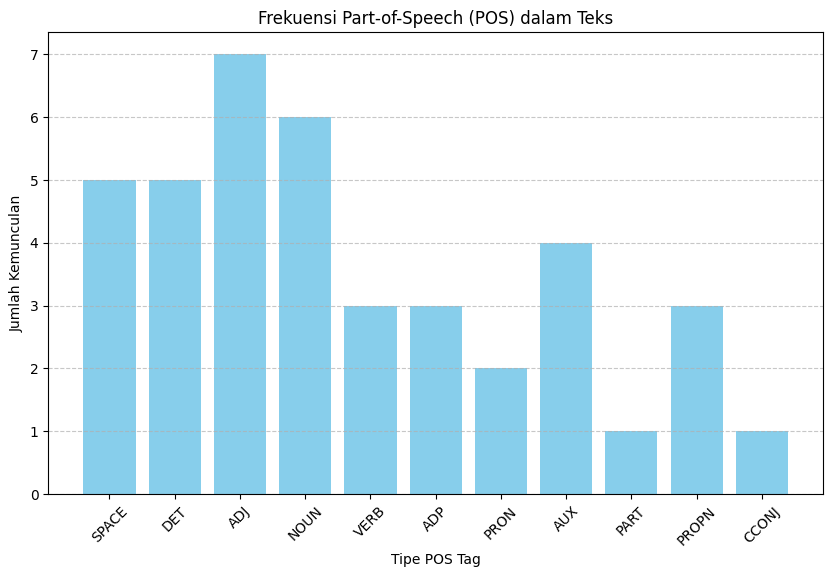

In [3]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Muat model bahasa Inggris
nlp = spacy.load("en_core_web_sm")

# Gunakan teks yang lebih panjang untuk statistik yang lebih menarik
teks_panjang = """
The quick brown fox jumps over the lazy dog. 
He was not pleased with the result. 
Learning POS Tagging is a challenging but rewarding experience.
She will be running a marathon next month in Semarang.
"""

# Proses teks
doc = nlp(teks_panjang)

# Ambil semua tag UPOS (Universal POS) dari teks
# .pos_ memberikan tag universal yang sederhana (NOUN, VERB, dll.)
pos_tags = [token.pos_ for token in doc if not token.is_punct] # Abaikan tanda baca

# Hitung frekuensi setiap tag menggunakan Counter
tag_counts = Counter(pos_tags)

# Siapkan data untuk plot
labels = tag_counts.keys()
values = tag_counts.values()

# Buat bar chart
plt.figure(figsize=(10, 6)) # Atur ukuran gambar
plt.bar(labels, values, color='skyblue')
plt.title('Frekuensi Part-of-Speech (POS) dalam Teks')
plt.xlabel('Tipe POS Tag')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45) # Putar label agar tidak tumpang tindih
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()